# Data Science Job Market Analysis 

## Part 2: Analyzing Scapped Data

### 1. Data Imports and Pre-processing

In [32]:
#--------------------------
# 1. Import library
#--------------------------

import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

In [3]:
#--------------------------
# 2. Load data
#--------------------------

# Read the generated (web scrapped) data. 
DS_jobs_df = pd.read_csv("DataScience_job_sample.csv", index_col=0)

#print the length of the data
print(f"\nThe length of the data is: {len(DS_jobs_df)}\n")

# print the first five rows to get a glimpse of the data
DS_jobs_df.head(5)


The length of the data is: 1009



,roles,companies,locations,experience,skills
0,Data Scientist,VGN Homes,NaN,NaN,"Data Science, Artificial Intelligence, Predict..."
1,Data Scientist - AI Solutions For Electrification,Siemens,Bengaluru,4-9 Yrs,"python, data manipulation, dl, reinforcement l..."
2,Data Scientist - L3,Wipro,Bengaluru,3-6 Yrs,"team management, machine learning, deep learni..."
3,Data Scientist,NaN,NaN,NaN,NaN
4,GCP Data Engineer,NaN,NaN,NaN,NaN


In [4]:
#--------------------------
# 3. Pre-process Data
#--------------------------

# 3.1 Check data for null (missing, NaN, None...) values
DS_jobs_df.isnull().sum()

roles          6
companies     11
locations     13
experience    18
skills        15
dtype: int64

In [5]:
# 3.2 Drop missing values
DS_jobs_df = DS_jobs_df.dropna()

In [6]:
# 3.3 Check data for duplicates
DS_jobs_df[DS_jobs_df.duplicated(subset=['roles', 'companies', 'locations', 'experience', 'skills'])].shape

(21, 5)

In [7]:
# 3.4 (Track and) Drop duplicates
print("Before dropping duplicates:", DS_jobs_df.shape)

# drop duplicates
DS_jobs_df.drop_duplicates(keep="first", inplace=True)

# after drop
print("\nAfter dropping duplicates:", DS_jobs_df.shape)

Before dropping duplicates: (990, 5)

After dropping duplicates: (969, 5)


In [8]:
# 3.5 Lower case of all the strings to avoid redundancy
DS_jobs_df = DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

In [9]:
# 3.6 Split some jobs that have multiple locations
DS_jobs_df.locations = [location.split(",") for location in DS_jobs_df.locations]

In [10]:
DS_jobs_df

,roles,companies,locations,experience,skills
1,data scientist - ai solutions for electrification,siemens,[bengaluru],4-9 yrs,"python, data manipulation, dl, reinforcement l..."
2,data scientist - l3,wipro,[bengaluru],3-6 yrs,"team management, machine learning, deep learni..."
8,data scientist iii,walmart,[bengaluru],6-7 yrs,"procurement, business services, system archite..."
9,data management - data scientist,ey,[bengaluru],3-4 yrs,"computer science, data analysis, erp, assuranc..."
10,data scientist,tech mahindra,[bengaluru],12-15 yrs,"deep learning, time management, django, analyt..."
...,...,...,...,...,...
1004,data scientist,vhr professional services,"[singapore, canada, united kingdom (uk)]",2-7 yrs,"data scientist, statistical analysis, r, phyth..."
1005,data scientist,reycruit,[hyderabad],5-10 yrs,"data science, scikit-learn, python, data, science"
1006,data scientist,talent corner hr services,[navi mumbai],2-4 yrs,"java, spark, apache, python, git, pandas, open..."
1007,data scientist,talent corner hr services,[mumbai (all areas)],2-4 yrs,"java, git, apache flink, pandas, open api, azu..."


### 2. Exploratory Data Analysis

#### 2. 1 Location Wise Data Science Jobs

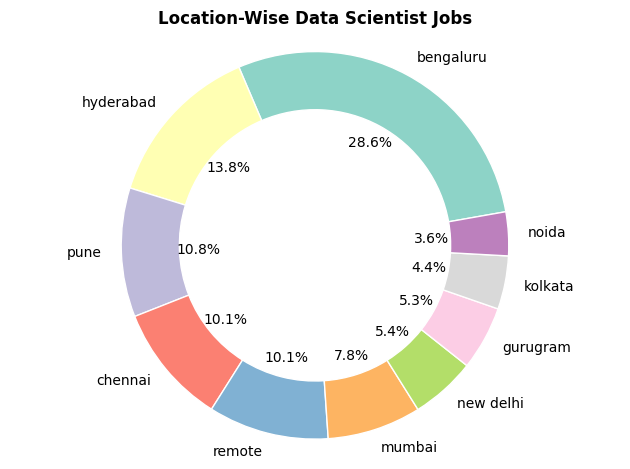

In [33]:
#--------------------------
# 4. Data Exploration
#--------------------------

# link of differnt collor pallets: https://matplotlib.org/stable/users/explain/colors/colormaps.html
colors = plt.cm.Set3.colors[:15]  # You can try 'Accent', 'tab10', or 'Dark2' for variety.

# 4.1 Top 10 locations with most data scientist jobs
location_counts = DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10]

# plot in a donut-style pie chart
plt.pie(
    location_counts,
    colors = colors,
    labels=location_counts.index,
    startangle=10,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title("Location-Wise Data Scientist Jobs", weight='bold')

# Add a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal') # ensure the pie is drawn as a circle
plt.tight_layout()

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)
plt.savefig("images/overview_jobs.png", dpi=300, bbox_inches='tight')

plt.show()

##### Observations:
1. Bangalore tops the list with approximately 30% of the total jobs.
2. Top three cities Bangalore, Hyderabad and Pune constitues more than 50% of the total jobs.

### 2.2 Companies with more Data Science openings 

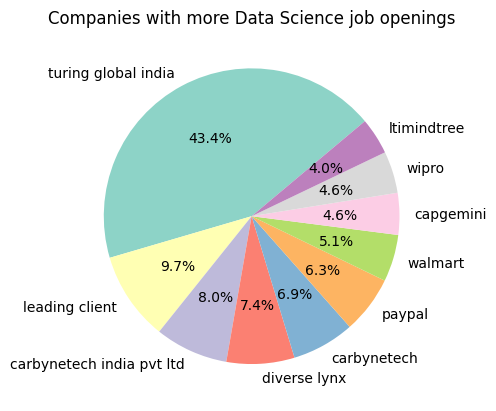

In [12]:
# 4.2 Companies with more data science job openings
company_count = DS_jobs_df["companies"].value_counts()[:10]

# plot in a pie chart
plt.pie(company_count,
        labels=company_count.index, # labels
        startangle=40,
        colors=colors,
        autopct='%1.1f%%')
plt.title("Companies with more Data Science job openings")
plt.show()

#### Observations:
1. Turing Global India tops the list with 43% of the total job listings.
2. there are quite a few consultancies activey recruiting for their clients.

### 2.3 Data Scientist roles in demand

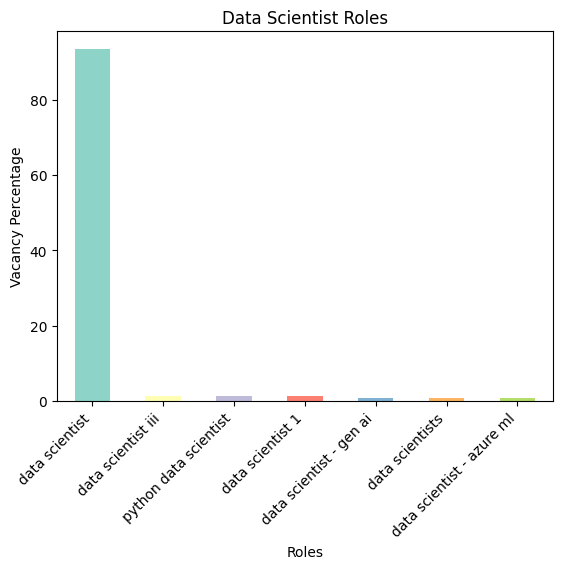

In [13]:
# 4.3 Calculate the percentage of each role
role_counts = DS_jobs_df["roles"].value_counts()[:7]
role_percentages = role_counts / role_counts.sum() * 100

# Plot the bar chart with percentages
role_percentages.plot.bar(color=colors)

# Customize the chart
plt.xticks(rotation=45, ha='right')
plt.title("Data Scientist Roles")
plt.ylabel("Vacancy Percentage", rotation=90)
plt.xlabel("Roles")
plt.show()

#### Observations:
1. Data science roles are mostly termed with data scientist role.

### 2.4 Desired experience for Data Science jobs

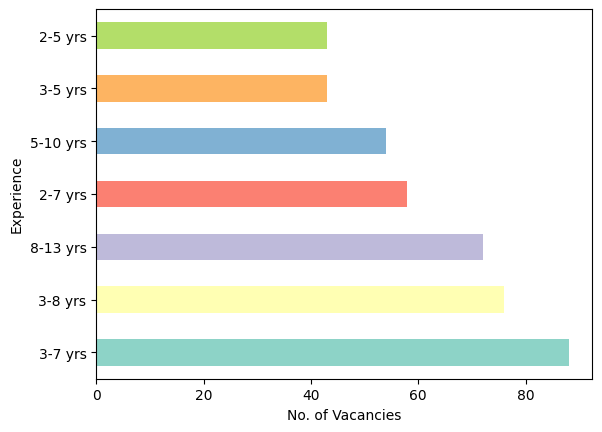

In [14]:
# 4.4 What years of experience are required to get a data science job
experience_count = DS_jobs_df["experience"].value_counts()[:7]
experience_count.plot.barh(color=colors)
plt.xlabel("No. of Vacancies")
plt.ylabel("Experience")
plt.show()

#### Observations:
1. There seems to be more vacancies for people with a mid/senior level.
2. Candidates with atleast 3 years of experience have a fair opportunity.

### 2.5 Skills required for a Data Science job

In [15]:
# 4.5 Specific skill required to get a data science job

# Tokenizing "skills" column
# Step 1: Split comma-separated strings into individual skills USING ".str.split(',')"
# Step 2: Explode to get one skill per row USING ".explode()"
# Step 3: Drop the spaces USING ".str.strip()"

skills_count = DS_jobs_df["skills"].str.split(',').explode().str.strip()

# Tope 7 most required skills in the data science job market
top_skills = skills_count.value_counts().head(20)
print(top_skills)

skills
machine learning               593
data science                   313
python                         284
data analysis                  210
sql                            199
analytical                     182
data                           130
computer science               129
natural language processing    129
artificial intelligence        119
data mining                    114
deep learning                  104
analytics                       99
machine                         77
data visualization              75
data scientist                  69
gcp                             68
predictive modeling             61
neural networks                 58
programming                     56
Name: count, dtype: int64


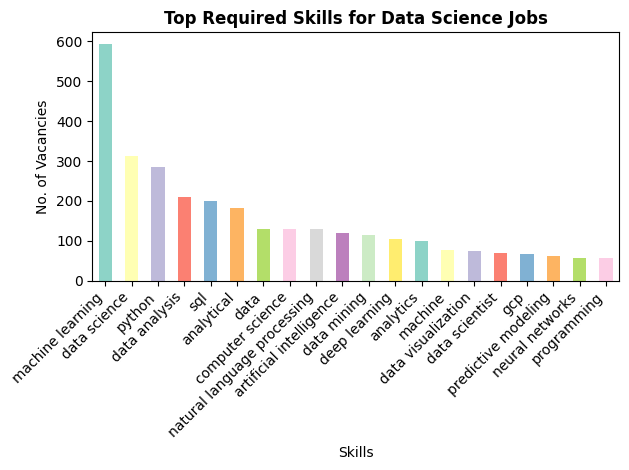

In [16]:
# Plot in a bar chart
top_skills.plot(kind="bar", color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("No. of Vacancies")
plt.xlabel("Skills")
plt.title("Top Required Skills for Data Science Jobs", weight='bold')
plt.tight_layout()
plt.show()

#### Observations: need update here
1. Looks clumsy right lets break it down, the reason i included top 30 skills beacuse of the vast fields covered by Data science.
2. we will go one by one sub fields and compare their peers in that to get the better understanding.

In [17]:
# Convert the skills column into a separate DataFrame, making it easier for further analysis.
skl_df = pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
skl_df.columns = ["skills", "count"]
skl_df.head()

,skills,count
0,data scientist,15
1,"algorithms, python, modeling, data analysis, d...",8
2,"computer vision, orchestration, gcp, analytica...",4
3,"azure, azure ml, mlflow, mlops, machine learni...",4
4,"supply chain, automation, front end, agile, sc...",3


### 2.5.1 Must-Have Data Science Skills

In [18]:
# Find general top skills for data science
# Extra material for regular expression: https://regexlearn.com/
datascience={}
datascience['statistics']=skl_df["count"][skl_df['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=skl_df["count"][skl_df['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=skl_df["count"][skl_df['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=skl_df["count"][skl_df['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=skl_df["count"][skl_df['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=skl_df["count"][skl_df['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=skl_df["count"][skl_df['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=skl_df["count"][skl_df['skills'].str.contains('big', regex=True)].sum()

# Sort the 'datascience' dictionary by its values in descending order
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': np.int64(605),
 'data_analysis': np.int64(245),
 'nlp': np.int64(153),
 'data_mining': np.int64(128),
 'statistics': np.int64(108),
 'deep_learning': np.int64(106),
 'computer_vision': np.int64(56),
 'big_data': np.int64(33)}

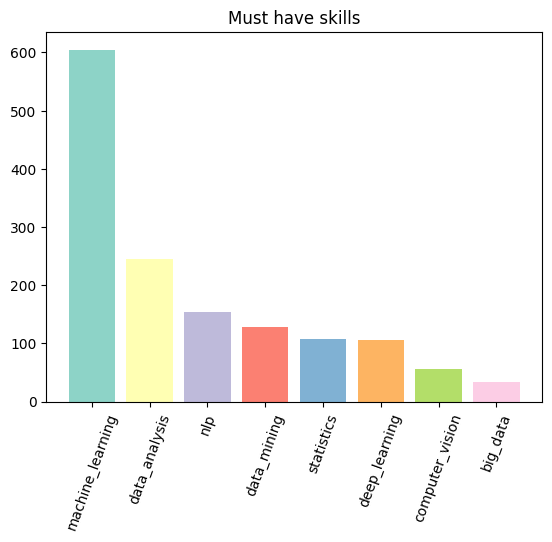

In [34]:
# Plot the most important skills.
plt.bar(datascience.keys(),datascience.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Must have skills")
plt.savefig("images/skills_top.png", dpi=300, bbox_inches='tight')
plt.show()

### 2.5.2 Programming languages in demand

<>:7: SyntaxWarning: invalid escape sequence '\+'
<>:7: SyntaxWarning: invalid escape sequence '\+'
/var/folders/k_/m7hq9l850hd6f3qfdc02z2g00000gn/T/ipykernel_77320/3375454296.py:7: SyntaxWarning: invalid escape sequence '\+'
  languages["c++"]=skl_df["count"][skl_df['skills'].str.contains('c\+', regex=True)].sum()


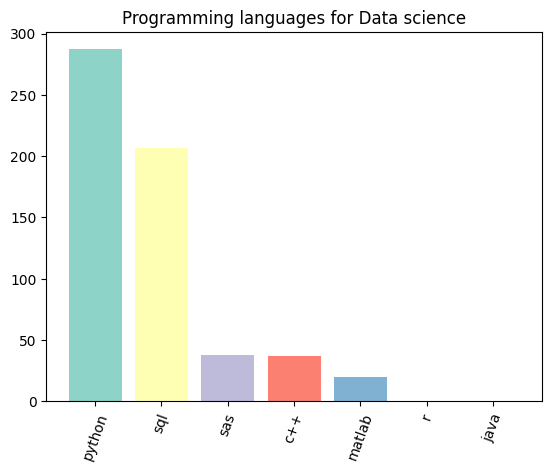

In [39]:
# Language selection
languages={}
languages["python"]=skl_df["count"][skl_df['skills'].str.contains('python', regex=True)].sum()
languages["r"]=skl_df["count"][skl_df['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=skl_df["count"][skl_df['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=skl_df["count"][skl_df['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=skl_df["count"][skl_df['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=skl_df["count"][skl_df['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=skl_df[skl_df['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(languages.keys(),languages.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Programming languages for Data science")
plt.savefig("images/skills_languages.png", dpi=300, bbox_inches='tight')
plt.show()

### 2.5.3 Deep learning frameworks

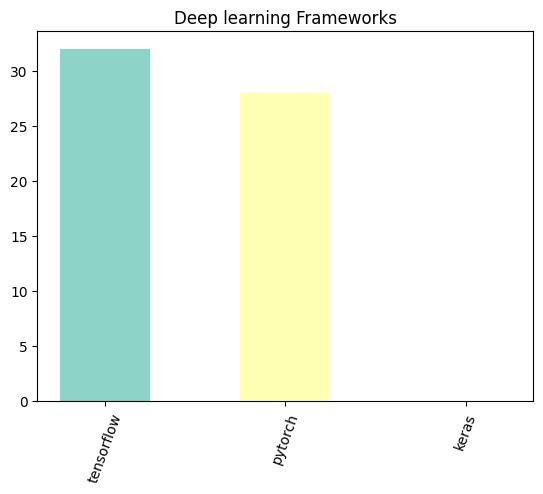

In [21]:
# Framework selection
frameworks={}
frameworks['tensorflow']=skl_df["count"][skl_df['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=skl_df["count"][skl_df['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=skl_df["count"][skl_df['skills'].str.contains('torch', regex=True)].sum()

# Sort
frameworks=dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(frameworks.keys(),frameworks.values(),color=colors,width=.5)
plt.xticks(rotation=70)
plt.title("Deep learning Frameworks")
plt.show()

### 2.5.4 Cloud systems in demand

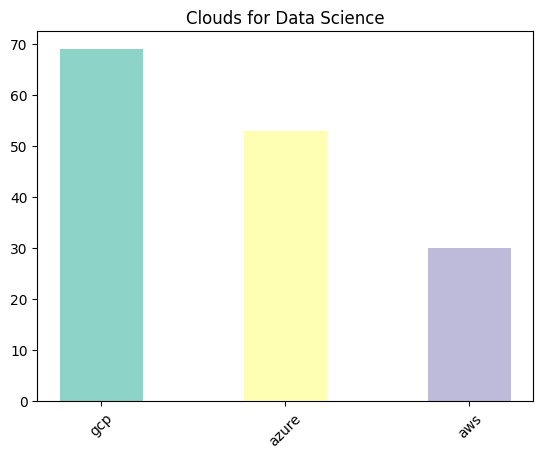

In [40]:
#Providers selection
cloud={}
cloud['aws']=skl_df["count"][skl_df['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=skl_df["count"][skl_df['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=skl_df["count"][skl_df['skills'].str.contains('gcp')].sum()

# Sort
cloud=dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(cloud.keys(),cloud.values(),color=colors,width=.45)
plt.xticks(rotation=45)
plt.title("Clouds for Data Science")
plt.savefig("images/skills_cloud.png", dpi=300, bbox_inches='tight')
plt.show()

### 2.5.5 Big data technologies

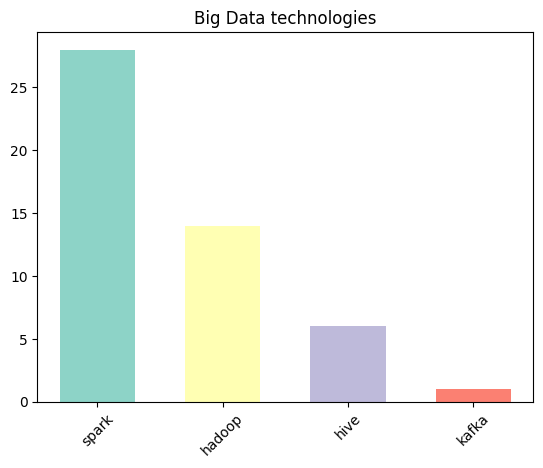

In [23]:
# Tech Selection
bigdata={}
bigdata["spark"]=skl_df["count"][skl_df['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=skl_df["count"][skl_df['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=skl_df["count"][skl_df['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=skl_df["count"][skl_df['skills'].str.contains('kafka', regex=True)].sum()

# Sort
bigdata=dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(bigdata.keys(),bigdata.values(),color=colors,width=0.6)
plt.xticks(rotation=45)
plt.title("Big Data technologies")
plt.show()

### 2.5.6 Data visualization tools

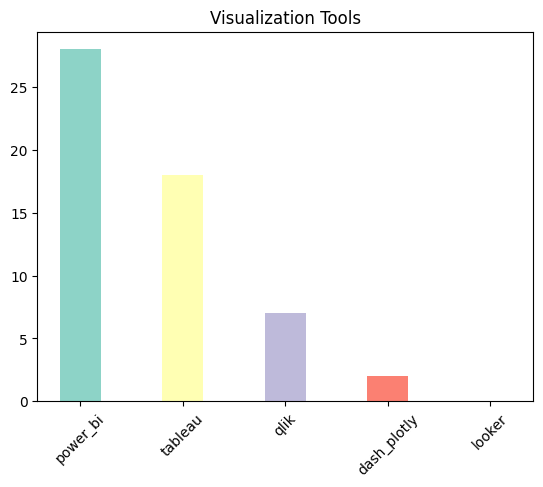

In [38]:
# tools selection
tools={}
tools["tableau"]=skl_df["count"][skl_df['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=skl_df["count"][skl_df['skills'].str.contains('power bi', regex=True)].sum()
tools["looker"] = skl_df["count"][skl_df['skills'].str.contains('looker', regex=True)].sum()
tools["qlik"] = skl_df["count"][skl_df['skills'].str.contains('qlik', regex=True)].sum()
tools["dash_plotly"] = skl_df["count"][skl_df['skills'].str.contains('plotly|dash', regex=True)].sum()

# Sort
tools=dict(sorted(tools.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(tools.keys(),tools.values(),color=colors,width=(0.4))
plt.xticks(rotation=45)
plt.title("Visualization Tools")
plt.savefig("images/skills_visualization.png", dpi=300, bbox_inches='tight')
plt.show()